# Plot variables related to anthropogenic heat
- This script is used to plot variables related to anthropogenic heat from simulations;
- Simulations: CNTL, TRAF at UK-Manchester. 

In [1]:
import os
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cftime
import string
import matplotlib.dates as mdates
home_path = '/gws/nopw/j04/duicv/yuansun/'

In [2]:
df = pd.read_csv('./data_for_figure/UK-Manchester.csv')
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M:%S')
df.head()

,time,FSH_U_cntl,URBAN_AC_cntl,URBAN_HEAT_cntl,VENTILATION_cntl,WASTEHEAT_cntl,FGR_U_cntl,FSH_U_traffic,URBAN_AC_traffic,URBAN_HEAT_traffic,VENTILATION_traffic,WASTEHEAT_traffic,FGR_U_traffic,TRAFFICFLUX_traffic,TRAFFICFLUX_cntl,AHF_cntl,AHF_traffic,hour,minute,diurnal
0,2022-01-01 01:00:00,-26.170258,0.0,6.337677,1.505959,1.300586,4.305870,-24.011946,0.0,6.337677,1.505959,1.300586,7.285527,8.433395,0,7.638264,16.071660,1,0,01:00
1,2022-01-01 02:00:00,-32.742588,0.0,6.229676,1.245074,1.267536,2.255315,-31.170126,0.0,6.210087,1.245074,1.267536,5.714578,8.427978,0,7.497211,15.905600,2,0,02:00
2,2022-01-01 03:00:00,-43.709030,0.0,6.177687,1.094389,1.245935,-6.408768,-42.758736,0.0,6.155823,1.060412,1.242017,-5.389267,4.213982,0,7.423622,11.611822,3,0,03:00
3,2022-01-01 04:00:00,-43.593456,0.0,6.313346,1.046665,1.235537,-14.708106,-42.123547,0.0,6.298296,1.010182,1.231165,-14.268779,4.213904,0,7.548883,11.743364,4,0,04:00
4,2022-01-01 05:00:00,-42.983097,0.0,6.431928,1.324741,1.262669,-16.880140,-41.499035,0.0,6.416971,1.302060,1.259659,-16.301218,4.213904,0,7.694597,11.890535,5,0,05:00


In [28]:
var_list = ['URBAN_AC', 'URBAN_HEAT', 'VENTILATION', 'FGR_U', 'TRAFFICFLUX', 'AHF']   # 'WASTEHEAT'
linewidth = 0.5
lc0 = '#1b9e77'
lc1 = '#d95f02'
lc2 = '#7570b3'
labelcolor = '#6b6b6b'
mid_time = [pd.to_datetime('2022-06-01 00:00:00')]
metric = ['7-day mean', 'Diurnal mean']
sequence2 = ['$Q_{ac}$', '$Q_{heat}$', '$Q_{v}$', '$Q_{w}$','$Q_{traffic}$', 'AHF']
labelfont = 6
padding = 4
xwidth = 0.5
pad = 1
handletextpad = 0.5
GRIDNAME = 'UK-Manchester'
length = 2
lc = [lc1, lc2]  
case_list = ['cntl', 'traffic']  
label_list = ['CNTL', 'TRAF']
ax_ymax_list = [0.002,       40,  9,  150,   40, 60]
ax2_ymax_list = [0.001, 0.0001,  1, -0.2,  0.2,   0.2, 4,    4, 19, 40, 19, 40]
ax2_ymin_list = [0,       0,    -3, -0.6, -0.6, -0.2,  0,   -4,     18.6, 0, 15, 0]

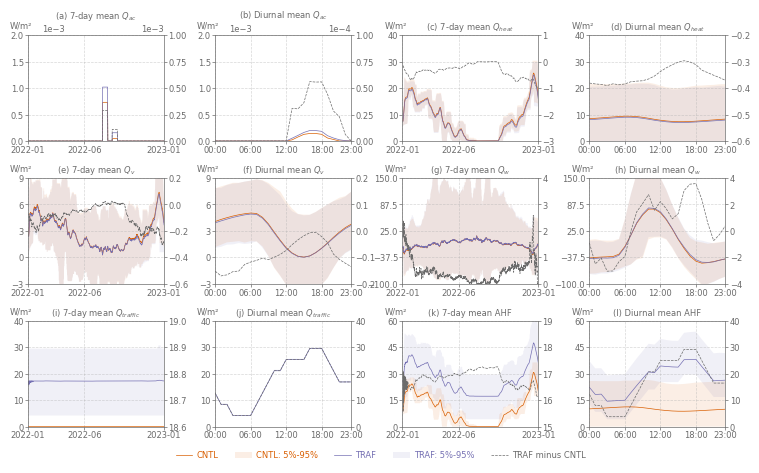

In [29]:
fig, axs = plt.subplots(3, 4, figsize=(7.5, 4.5))
ax = axs.flatten()
for i in range(12):
    var_index = i // 2
    var_indexed = var_list[var_index]
    ax2 = ax[i].twinx() 
    if var_index == 2:
        ax_ymin = -3
    elif var_index ==3:
        ax_ymin = -100        
    else:
        ax_ymin = 0
    ax_ymax = ax_ymax_list[var_index]
    ax2_ymin = ax2_ymin_list[i]
    ax2_ymax = ax2_ymax_list[i]
    ax[i].set_ylim([ax_ymin, ax_ymax])
    ax2.set_ylim([ax2_ymin, ax2_ymax])
    ax[i].set_yticks([ax_ymin, ax_ymin + (ax_ymax - ax_ymin)/4, (ax_ymin + ax_ymax)/2, ax_ymax - (ax_ymax - ax_ymin)/4, ax_ymax])
    ax2.set_yticks([ax2_ymin, ax2_ymin + (ax2_ymax - ax2_ymin)/4, (ax2_ymin + ax2_ymax)/2, ax2_ymax - (ax2_ymax - ax2_ymin)/4, ax2_ymax])        
    for c, case in enumerate(case_list):
        var = f'{var_indexed}_{case}'
        df_case = df[['time', var]].copy().reset_index()
        df_case['time'] = pd.to_datetime(df_case['time'], format='%Y-%m-%d %H:%M:%S')
        df_case.set_index('time', inplace=True)
        seven_day_mean = df_case[var].rolling(window=336, min_periods=48).mean()
        seven_day_5 = df_case[var].rolling(window=336, min_periods=48).quantile(0.05)
        seven_day_95 = df_case[var].rolling(window=336, min_periods=48).quantile(0.95)
        df_case_diurnal = df[['diurnal', var]].copy()
        diurnal_mean = df_case_diurnal.groupby('diurnal').mean(numeric_only=True)
        diurnal_5 = df_case_diurnal.groupby('diurnal').quantile(0.05)
        diurnal_95 = df_case_diurnal.groupby('diurnal').quantile(0.95)
        if i%2==0:
            ax[i].plot(df_case.index, seven_day_mean.values, label=label_list[c], color=lc[c], linewidth=linewidth)
            ax[i].fill_between(df_case.index, seven_day_5.values, seven_day_95.values, alpha=0.1, color=lc[c],  edgecolor='none', label=label_list[c] + ': 5%-95%')
            xticks = [df['time'].iloc[0]] + mid_time + [df['time'].iloc[-1]]
            #xticks = [df['time'].iloc[0]] + mid_time 
            ax[i].set_xticks(xticks)
            ax[i].set_xlim([df.time.iloc[0], df.time.iloc[-1]])
            ax[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  
        elif i%2==1: 
            ax[i].plot(diurnal_mean.index, diurnal_mean[var], label=label_list[c], color=lc[c], linewidth=linewidth)
            ax[i].fill_between(diurnal_mean.index, diurnal_5[var], diurnal_95[var], alpha=0.1, color=lc[c],  edgecolor='none', label=label_list[c] + ': 5%-95%')
            ax[i].set_xticks([diurnal_mean.index[0], '06:00', '12:00', '18:00', diurnal_mean.index[-1]])
            ax[i].set_xlim([diurnal_mean.index[0], diurnal_mean.index[-1]])
        ax[i].set_title(f'({string.ascii_lowercase[i]}) {metric[i%2]} {sequence2[i//2]}',fontsize=labelfont,color=labelcolor, pad = padding)      
        ax[i].set_ylabel('W/m²' ,labelpad=5, rotation=0, ha='center', fontsize=labelfont,color=labelcolor)
        ax[i].yaxis.set_label_coords(-0.05, 1.05)
        if i in [0, 1]:
           ax[i].ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
           offset_text = ax[i].yaxis.get_offset_text()
           offset_text.set(size=labelfont, color=labelcolor)
           offset_text.set_position((0.1, -0.2))
           ax2.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
           offset_text2 = ax2.yaxis.get_offset_text()
           offset_text2.set(size=labelfont, color=labelcolor)
           offset_text2.set_position((1, -0.2))
        ax[i].tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelcolor=labelcolor, color=labelcolor,labelsize=labelfont,pad=pad, width = xwidth, length = length)
        ax[i].tick_params(axis='x', which='both', top=False, bottom=True, labelbottom=True, labelcolor=labelcolor,color=labelcolor,labelsize=labelfont,pad=pad, width = xwidth, length = length)
        for spine in ax[i].spines.values():
            spine.set_linewidth(xwidth)
            spine.set_edgecolor(labelcolor)       
        ax[i].grid(True,linestyle='--',linewidth=0.5, alpha=0.5)
    df_cntl = df[f'{var_indexed}_cntl']
    df_traf = df[f'{var_indexed}_traffic']
    delta = pd.DataFrame({var_indexed: df_traf.values - df_cntl.values})
    delta['diurnal'] = df_case_diurnal['diurnal']
    delta_index = delta.copy()
    delta_index['time'] = df_case.index
    delta_index.set_index('time', inplace=True)
    delta_senven_day_mean = delta_index[var_indexed].rolling(window=336, min_periods=48).mean()
    delta_diurnal_mean = delta.groupby('diurnal').mean(numeric_only=True)[var_indexed]
    if i%2==0:
       ax2.plot(df_case.index, delta_senven_day_mean.values, label='TRAF minus CNTL', color=labelcolor, linewidth=linewidth, linestyle='--')
    elif i%2==1:
       ax2.plot(diurnal_mean.index, delta_diurnal_mean.values, label='TRAF minus CNTL', color=labelcolor, linewidth=linewidth, linestyle='--')
    for spin in ax2.spines.values():
        spin.set_visible(False)   
    ax2.tick_params(axis='y', which='both', left=False, right=True, labelleft=False, labelcolor=labelcolor, color=labelcolor,labelsize=labelfont,pad=pad, width = xwidth, length = length)
    ax2.tick_params(axis='x', which='both', top=False, bottom=False, labelbottom=False)    
plt.subplots_adjust(left=0.03, right=0.96, bottom=0.075, top=0.945, wspace=0.375, hspace= 0.35)
lines1, labels1 = ax[0].get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
legend = fig.legend(lines, labels, bbox_to_anchor=(0.5, -0.015), loc='lower center', frameon=False, 
                        handletextpad=handletextpad, fontsize=labelfont, ncol=7)
for i, text in enumerate(legend.get_texts()):
    text.set_color((lc + [labelcolor])[i//2])
#plt.suptitle('Timeseries and diurnal plots for ' + GRIDNAME, fontsize=labelfont+2, color=labelcolor,x=0.5, y=0.99, ha='center', va='top')
fig.savefig(f'{GRIDNAME}_ahf.png', dpi=300)   

# Description

In [66]:
df_traf_traffic = df[['time', 'TRAFFICFLUX_traffic']]
df_traf_traffic.mean()

time                   2022-07-02 12:30:00
TRAFFICFLUX_traffic              18.671672
dtype: object

In [8]:
print(np.round(df['AHF_cntl'].mean(),2), np.round(df['AHF_traffic'].mean(),2))

9.93 26.77
